In [ ]:
## Below analysis id done with help of websites
##1)https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118#:~:text=Plaque%20buildup%20thickens%20and%20stiffens,exercise%2C%20being%20overweight%20and%20smoking.
##2)https://www.acc.org/latest-in-cardiology/articles/2018/07/06/12/42/cover-story-obesity-and-cardiovascular-disease-risk#:~:text=Increased%20Cardiovascular%20Disease%20Risk,Harold%20Bays%2C%20MD%2C%20FACC.
##3)https://www.healthline.com/health/high-blood-pressure-hypertension/blood-pressure-reading-explained#:~:text=For%20a%20normal%20reading%2C%20your,60%20and%20less%20than%2080.

In [1]:
## Step 1 Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
## Step 2 loading the data
df=pd.read_csv('cardio_train.csv',sep=';')
df.head()
df.tail()
##df.shape

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


#### Step 3 Variable description
1)id:-unique identity of patient
2)age:-age of patient
3)gender:gender of patient
4)height
5)weight
6)ap_hi:-systolic blood pressure
7)ap_lo:-diastolic blood pressure
8)cholesterol level :-normal,abovenormal,well above normal
9)gluc:-normal,abovenormal,well above normal
10)smoking:does patient smoke
11)alcohol intake:-does patient intake alcohol
12)physical activity
13)cardio:-presence or absence of cardiovascular disease


## Step 4 Exploratory Data Analysis

In [6]:
## step 4.1 Getting the datatype of variables
## since the categorical features such as gender,alco,gluco are encoded already in numerical values,
## lets separate them on the basis of domain knowledge
numerical_features=df[['id','age','height','weight','ap_hi','ap_lo']]
categorical_fetaures=df[['gender','cholesterol','gluc','smoke','alco','active','cardio']]

In [7]:
## Step 4.2 Basic statistical information of numerical  features
numerical_features.describe()

,id,age,height,weight,ap_hi,ap_lo
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,164.362217,74.203027,128.829584,96.650092
std,28563.100347,2467.261818,8.205337,14.383469,154.775805,189.096240
min,988.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,25745.000000,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,50494.000000,19704.000000,165.000000,72.000000,120.000000,80.000000
75%,75150.000000,21326.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000


In [ ]:
## No missing data found.
## id is unique data,we can remove it
## age is in number of days
## ap_hi and ap_lo has some datapoints with negative values and values in 3 digits(measurement error)

In [44]:
## step 4.3 checking the target variable

CountNoDisease = len(df[df.cardio == 0])
CountHaveDisease = len(df[df.cardio == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((CountNoDisease / (len(df.cardio))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((CountHaveDisease / (len(df.cardio))*100)))

Percentage of Patients Haven't Heart Disease: 50.04%
Percentage of Patients Have Heart Disease: 49.96%


Text(0, 0.5, 'No of patients')

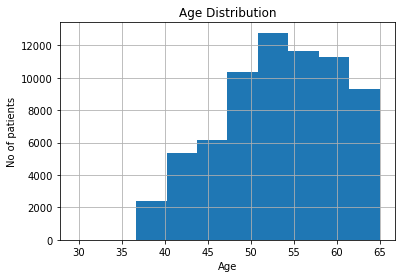

In [9]:
##step 4.4 Analysis of age
df['age']=(df['age']/365).round(2)
fig=df.age.hist()
fig.set_title('Age Distribution')
fig.set_xlabel('Age')
fig.set_ylabel('No of patients')
## Majority of patients have age between 48 to 65 years

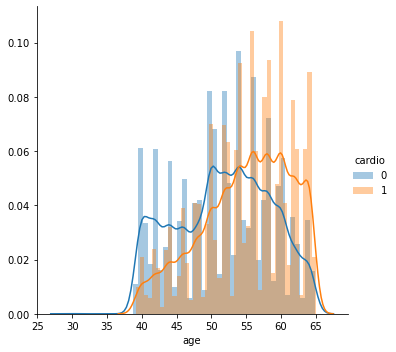

In [19]:
## Relationship with target
sns.FacetGrid(df,hue='cardio',height=5).map(sns.distplot,'age').add_legend()
## we can see from plot as no of patients count increased as increase in age.
## so age can be resposible to have chance of cardiovascular diseases.

In [27]:
## STep 4.5 Analysis of gender
## In the shared document it is not given whether which one is male or female.
## As per the domain knowlegde study nen are generally at greater risk of heart disease. 
##However, women's risk increases after menopause i.e after 40 and at an average 51years
## so lets count no of patients haing age greater than 50 and their gender and if they have cardiova
##scular disease or not.
dm=df.loc[(df['age']>51) &(df['cardio']==1) ]


In [29]:
dm.gender.value_counts()
## so we can say 1 is male and 2 female.

1    16952
2     8640
Name: gender, dtype: int64

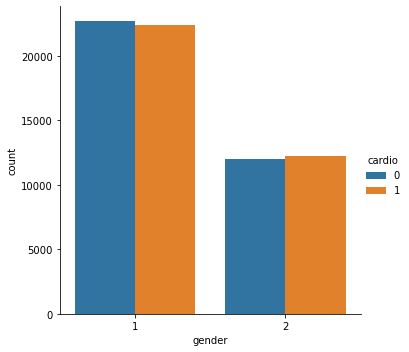

In [31]:
sns.catplot(x='gender',data=df,hue='cardio',kind='count')
## from the given data the number of male and female patients suffering and not suffering are equal.
## males are having highest count of cardivascular disease.

In [45]:
countFemale = len(df[df.gender == 2])
countMale = len(df[df.gender == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.gender))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.gender))*100)))

Percentage of Female Patients: 34.95%
Percentage of Male Patients: 65.05%


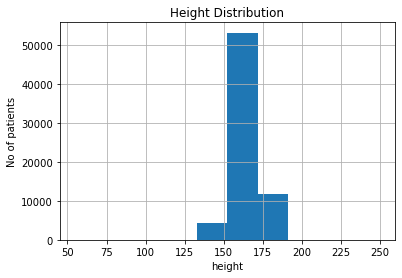

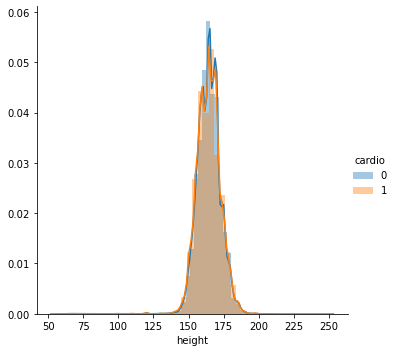

In [28]:
## Step 4.6 Analysis of height
fig=df.height.hist()
fig.set_title('Height Distribution')
fig.set_xlabel('height')
fig.set_ylabel('No of patients')
## most height of pateints have been concentrated between 150 to 175 cm
sns.FacetGrid(df,hue='cardio',height=5).map(sns.distplot,'height').add_legend()


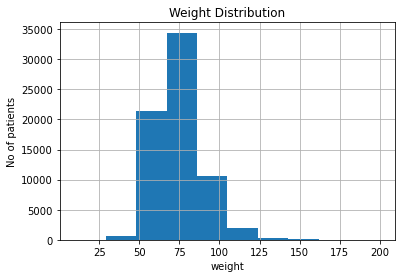

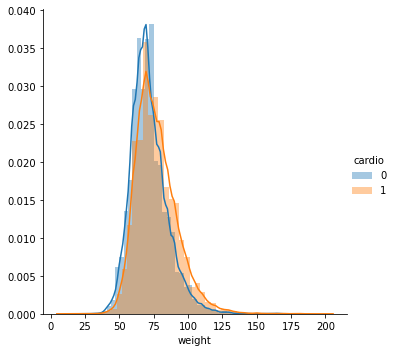

In [31]:
##Step 4.7 Analysis of weight
## There are is high risk of getting cardiovascular diease to person suffering from obesity(fat).
## However there are body builders with wieght than normal which is muscle weight so only weight
## is not responsible for cardiovascular disease.
fig=df.weight.hist()
fig.set_title('Weight Distribution')
fig.set_xlabel('weight')
fig.set_ylabel('No of patients')
## There are patients who have wieght greater than 100kgs
sns.FacetGrid(df,hue='cardio',height=5).map(sns.distplot,'weight').add_legend()
## From distribution we can say that higher the wieght more is the number of patients with cardiovascular.


In [ ]:
## Step 4.8 Analysis of ap_hi and ap_lo
## ap_hi is systolic blood pressure is the amount of pressure in arteries 
##during the contraction of  heart muscle.
## ap_lo is diastolic pressure when  heart muscle is between beats.


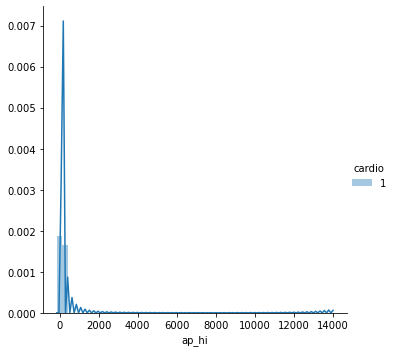

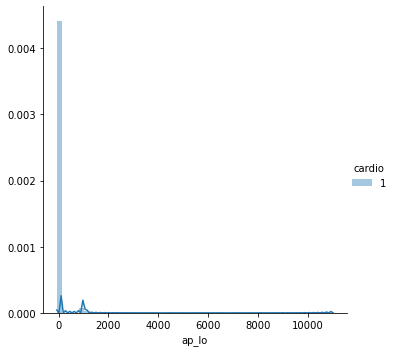

In [32]:
sns.FacetGrid(dm,hue='cardio',height=5).map(sns.distplot,'ap_hi').add_legend()
sns.FacetGrid(dm,hue='cardio',height=5).map(sns.distplot,'ap_lo').add_legend()

In [ ]:
## Since due to presence various measurement error the visulation is not good.
## The normal range of blood pressure in human body is120/80mmHg.
## Increase blood pressure has huge impact on increasing the risk of heart disease.
##Uncontrolled high blood pressure can result in hardening and thickening of your arteries, 
##narrowing the vessels through which blood flows.

In [186]:
## Step 4.9 Analysis of cholesterol
##High levels of cholesterol in  blood can increase the risk of 
##formation of plaques and atherosclerosis which are type of cardiovascular disease.
df.cholesterol.value_counts()
## 1---->Normal===>ok
##2------>Above normal===>High
##3----->Well above normal====>Alarming
## Patients from above normal and well above normal category has highest no of patietns with cardio disease

1    51868
2     9446
3     7987
Name: cholesterol, dtype: int64

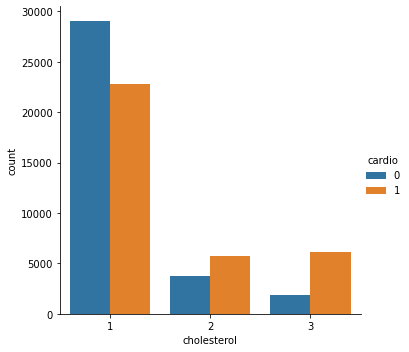

In [187]:
sns.catplot(x='cholesterol',data=df,kind='count',hue='cardio')

In [188]:
## Step 4.10 Analysing gluc
##Diabetes increases your risk of heart disease. Both conditions share similar risk factors,
##such as obesity and high blood pressure.
df.gluc.value_counts()
## 1---->Normal
##2------>Above normal
##3----->Well above normal
## Majority of patients with normal glucose level are highest no of cardio patients

1    58885
3     5277
2     5139
Name: gluc, dtype: int64

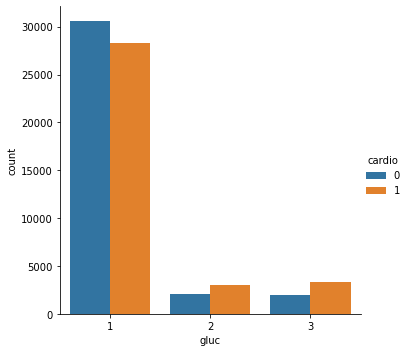

In [189]:
sns.catplot(x='gluc',data=df,kind='count',hue='cardio')

In [33]:
##step 4.11 Analysing smoke
df.smoke.value_counts()
##Nicotine constricts blood vessels, and carbon monoxide can damage their inner lining,
##making them more susceptible to atherosclerosis.
##Heart attacks are more common in smokers than in nonsmokers.
##0-->non smoker
##1-->smoker

0    63199
1     6102
Name: smoke, dtype: int64

In [41]:
pd.crosstab(df.smoke,df.cardio,margins='all')

cardio,0,1,All
smoke,,,
0,31476,31723,63199
1,3203,2899,6102
All,34679,34622,69301


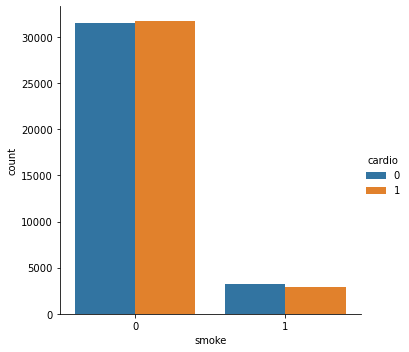

In [191]:
sns.catplot(x='smoke',hue='cardio',data=df,kind='count')


In [192]:
##step 4.12 Analysing alco
df.alco.value_counts()
## Heavy intake of alcohol can increase blood pressure and which is one of the most important risk 
##factors for having a heart attack or a stroke
## 0--->No intake of alcohol
##1--->Intake of alcohol

0    65567
1     3734
Name: alco, dtype: int64

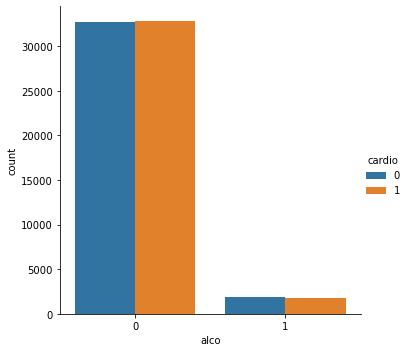

In [193]:
sns.catplot(x='alco',hue='cardio',data=df,kind='count')
## Majority of patient who intake alcohol have highest in cardio disease

In [194]:
## Step 4.13 Analysing active
df.active.value_counts()
## Lack of exercise also is associated with many forms of heart disease 
##and some of its other risk factors, as well.
## 1--->Do physical activity
##0--->No physical activity

1    55717
0    13584
Name: active, dtype: int64

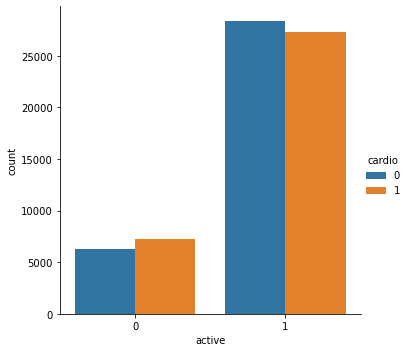

In [196]:
sns.catplot(x='active',hue='cardio',data=df,kind='count')

In [83]:
df.groupby(by=['active','cardio'])['cardio'].count()
## There are 10% of patients who are not involved in physical activity having cardio disease.

active  cardio
0       0          6308
        1          7276
1       0         28371
        1         27346
Name: cardio, dtype: int64

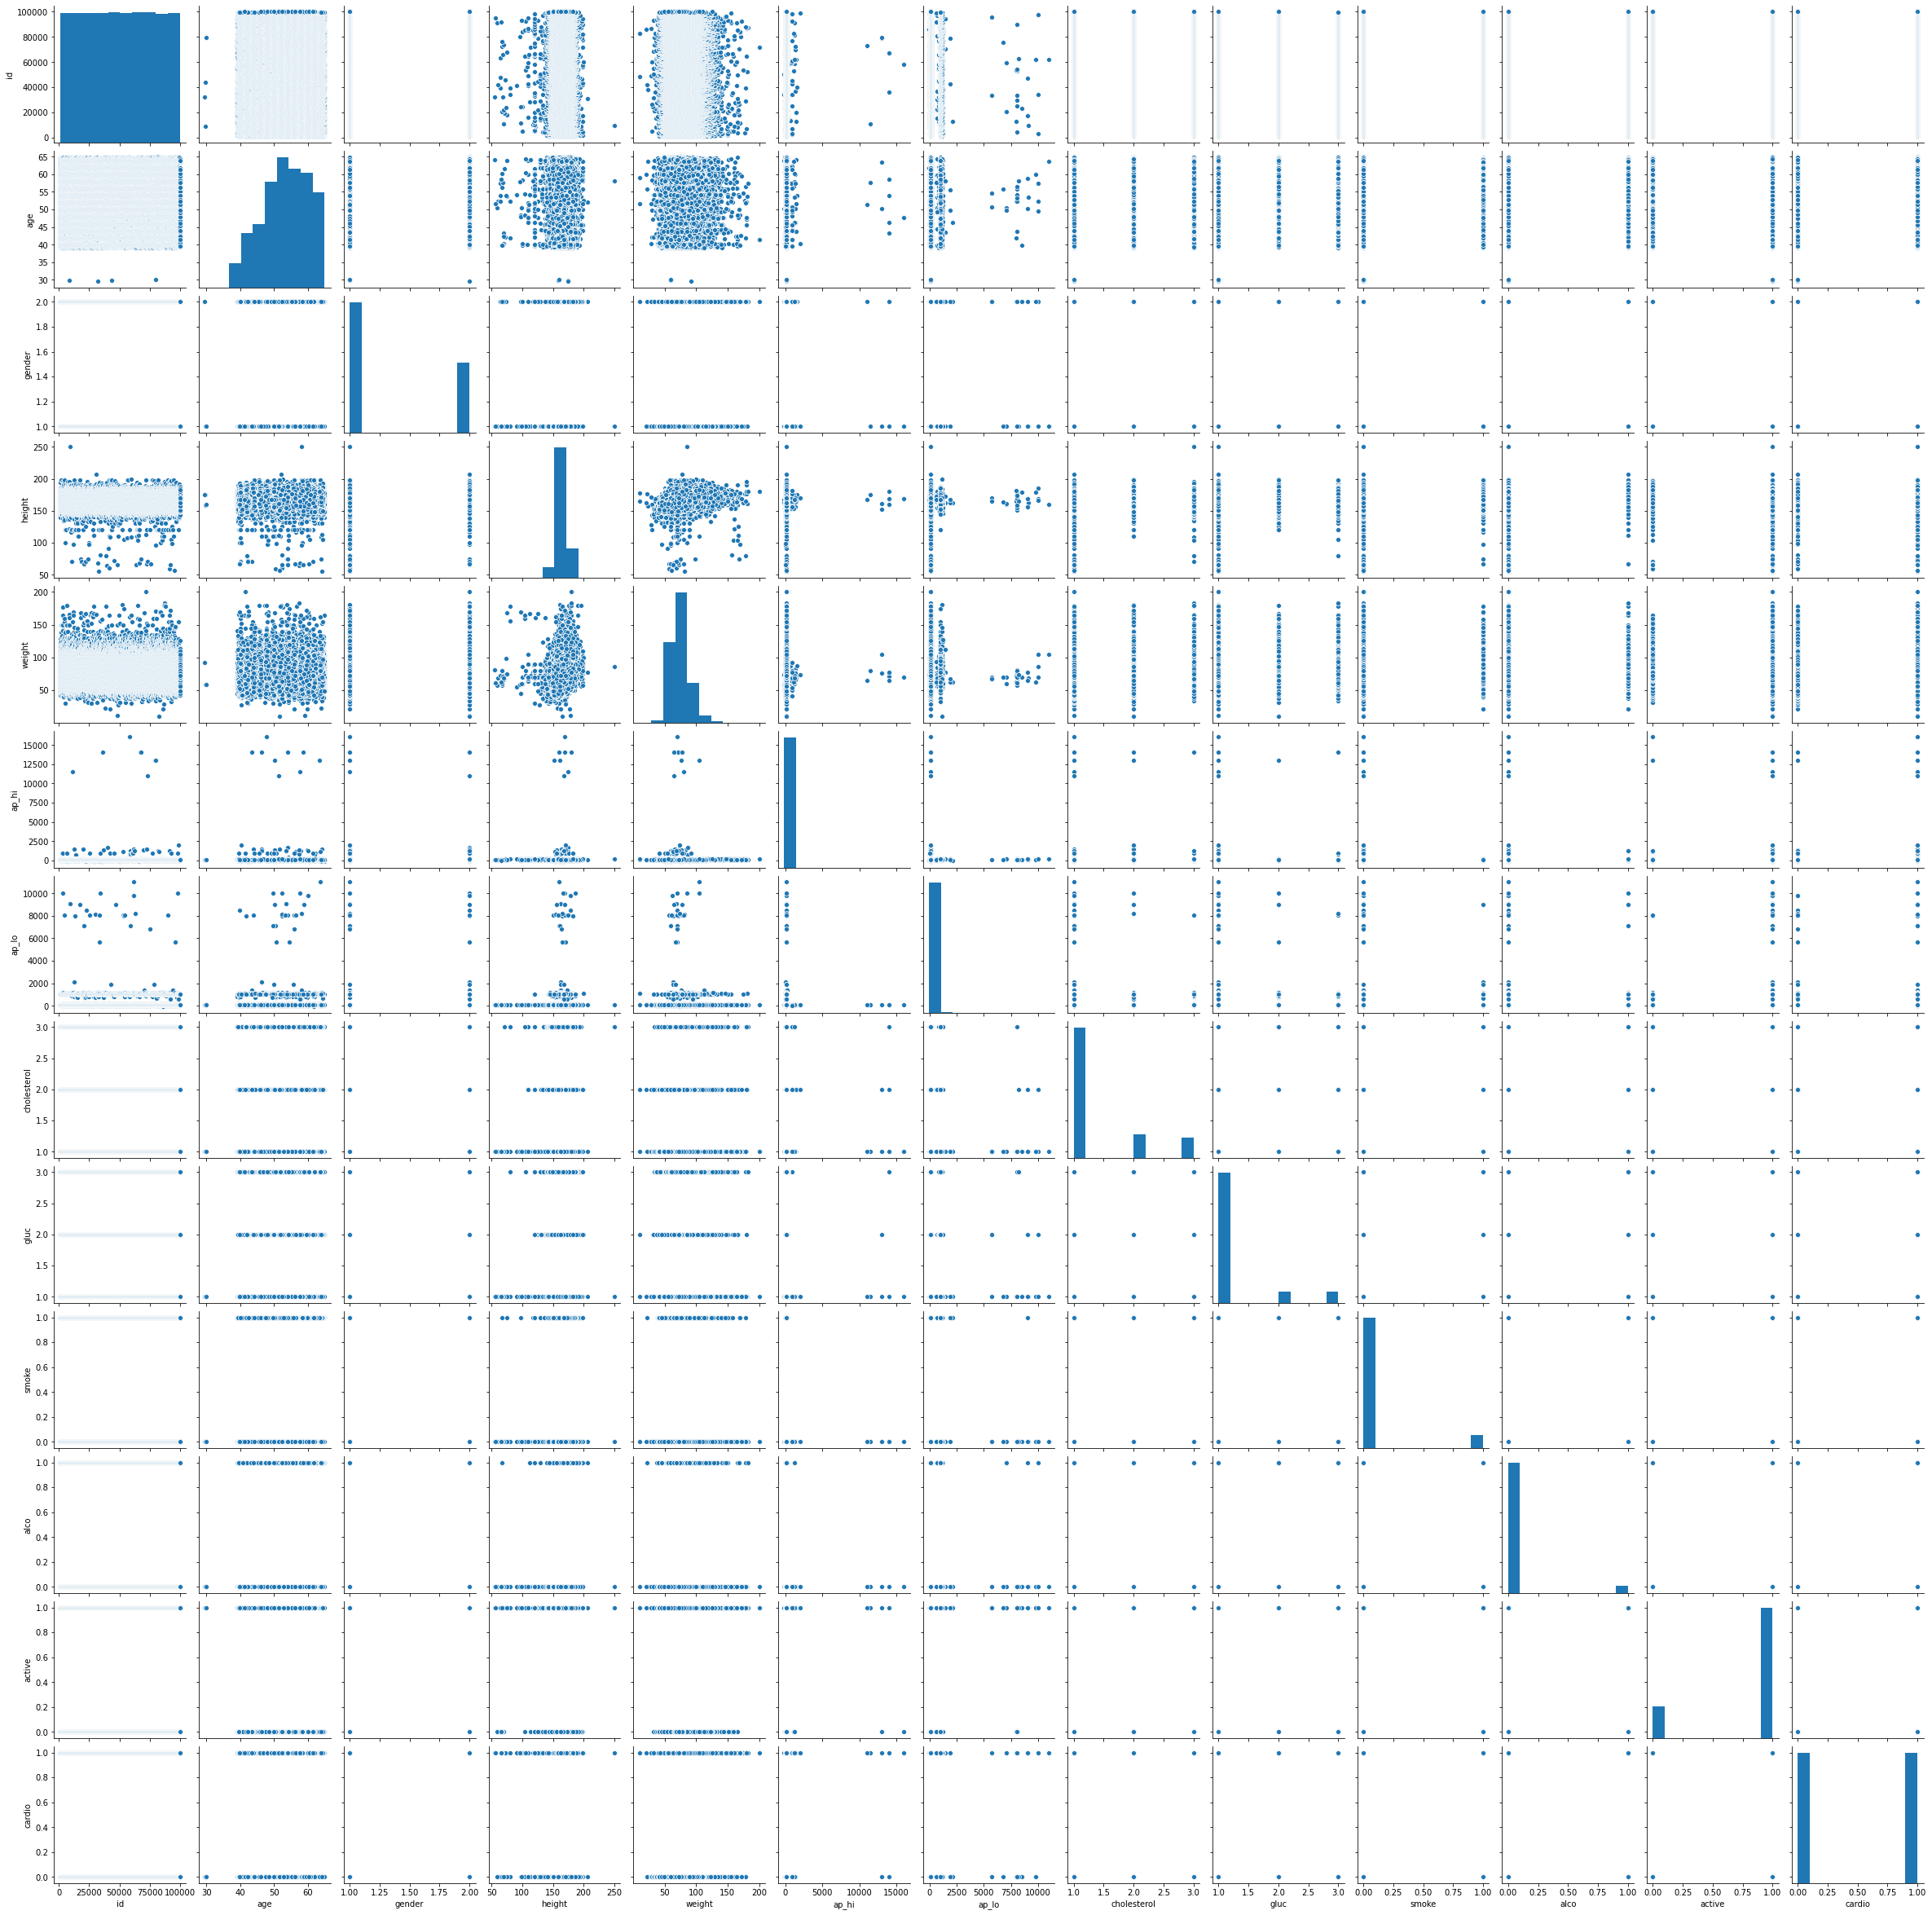

In [43]:
## checking the visualization of all variables
sns.pairplot(df)

## Final conculsion after exploratory data analysis

No handles with labels found to put in legend.
No handles with labels found to put in legend.


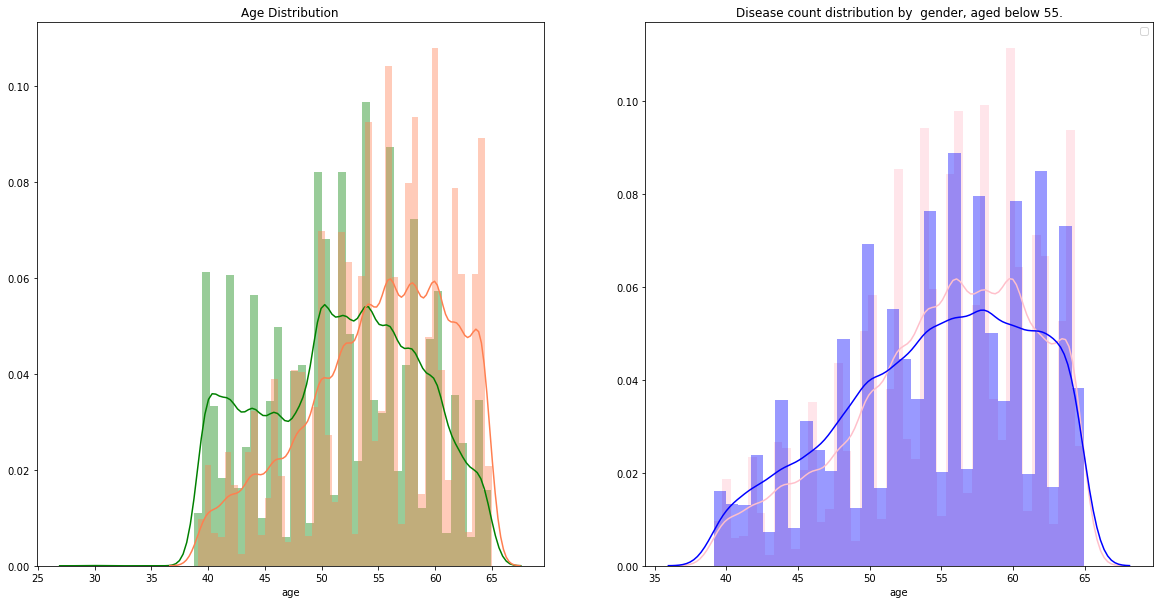

In [53]:
## Analysis of age,gender  and cardio
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot(df['age'][df['cardio']==0], ax = ax1, color='green')
sns.distplot(df['age'][df['cardio']==1], ax = ax1,color='coral')
ax1.set_title('Age Distribution')


sns.distplot(df['age'][(df['gender']==1) & (df['cardio']==1)],ax = ax2,color='pink').legend()
sns.distplot(df['age'][(df['gender']==2) & (df['cardio']==1)],ax = ax2,color='blue').legend()
ax2.set_title('Disease count distribution by  gender, aged below 55.')

plt.show()

In [ ]:
## Patients above 55 years aged have diagonsed with cardio diseases.
## As assumed above 1 as male can be validated mens have higer chances of cardio diseases.

In [54]:
## comparing height,weight and age
## making height in foots 
df['height'] = df['height']*0.0328084 

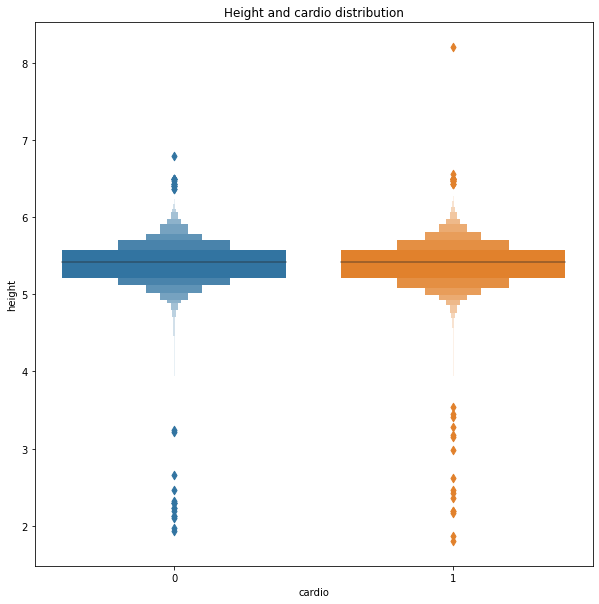

In [57]:
fig, (ax1) = plt.subplots(1,1, figsize=(10,10))
sns.boxenplot(df['cardio'],(df['height']),ax=ax1)
ax1.set_title('Height and cardio distribution')
plt.show()
## There are huge number of outliers below 4 foot and a few above  8 foots.
## patients below 4 foot can be children and they cannot be included in our analysis.
## For that we need to check age and height distribution along with weight

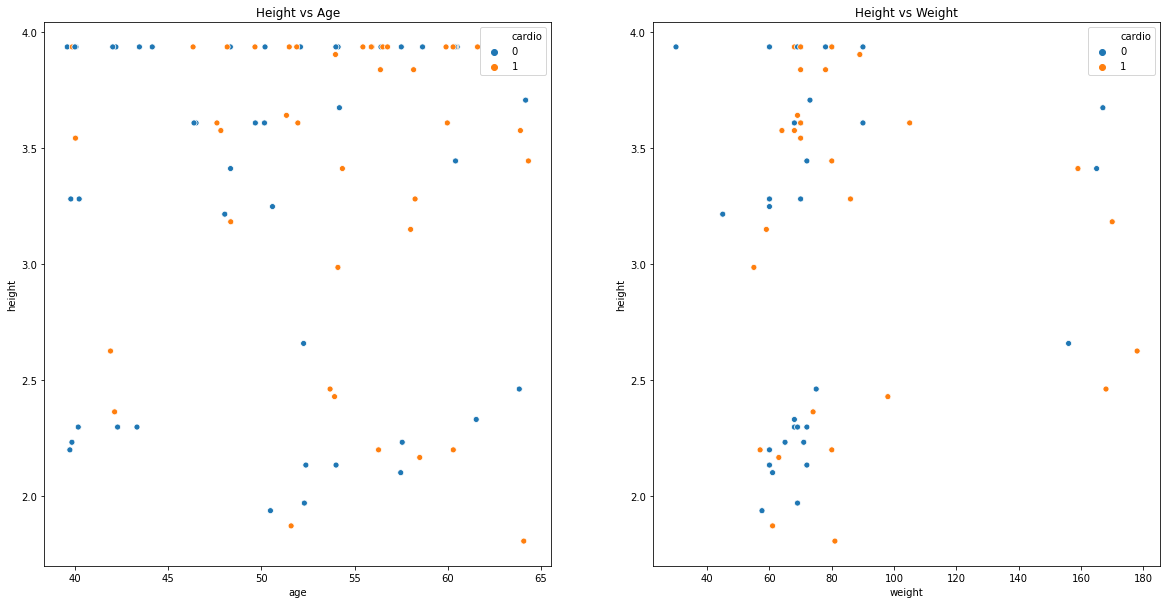

In [62]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.scatterplot(df['age'],df['height'][(df['height'])<4],hue=df['cardio'],ax=ax1)
ax1.set_title('Height vs Age')
sns.scatterplot(df['weight'],df['height'][(df['height'])<4],hue=df['cardio'],ax=ax2)
ax2.set_title('Height vs Weight')
plt.show()


In [ ]:
## From above plot we can say patients below 4 foot height are aged above 40 years are having 
## weight above 40kgs are seems to be outliers.

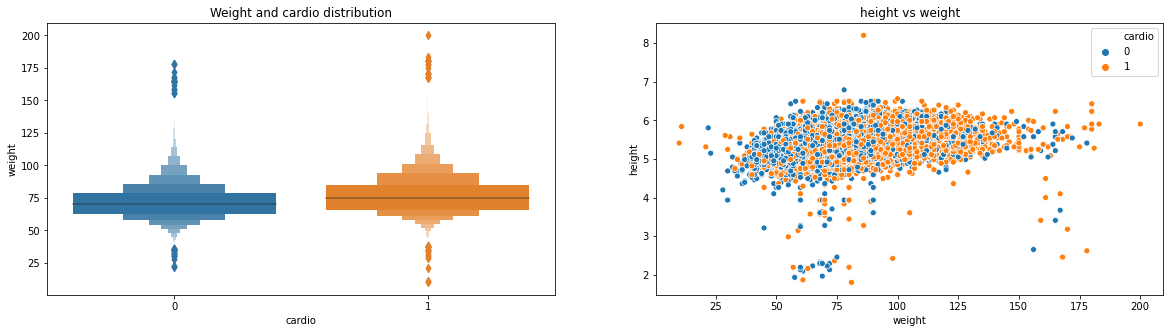

In [64]:
## Analysing weight,age and cardio
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
sns.boxenplot(df['cardio'],(df['weight']),ax=ax1)
ax1.set_title('Weight and cardio distribution')
sns.scatterplot(df['weight'],df['height'],ax=ax2,hue=df['cardio'])
ax2.set_title('height vs weight')
plt.show()

In [ ]:
## There are patients who are having weight greater than 175kg and height less than 4 foot which seem
## to be abnormal.Also patients less than 25 kg

Text(0.5, 1.0, 'ap_lo and cardio distribution')

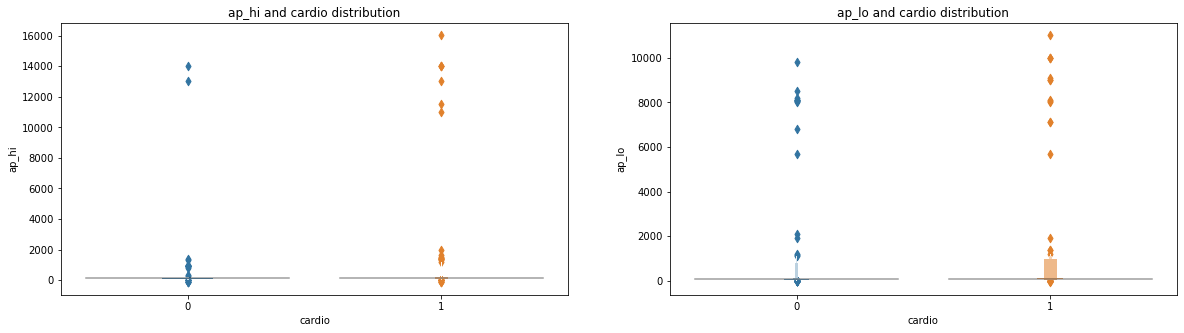

In [68]:
## Analysing ap_hi,ap_low and cardio
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
sns.boxenplot(df['cardio'],(df['ap_hi']),ax=ax1)
ax1.set_title('ap_hi and cardio distribution')
sns.boxenplot(df['cardio'],(df['ap_lo']),ax=ax2)
ax2.set_title('ap_lo and cardio distribution')

In [ ]:
## As the systolic bp ranges 90mmHg to 180mmHg.There are many observational error we can find here.
## diastolic bp rages 80mmHg to 120mmHg

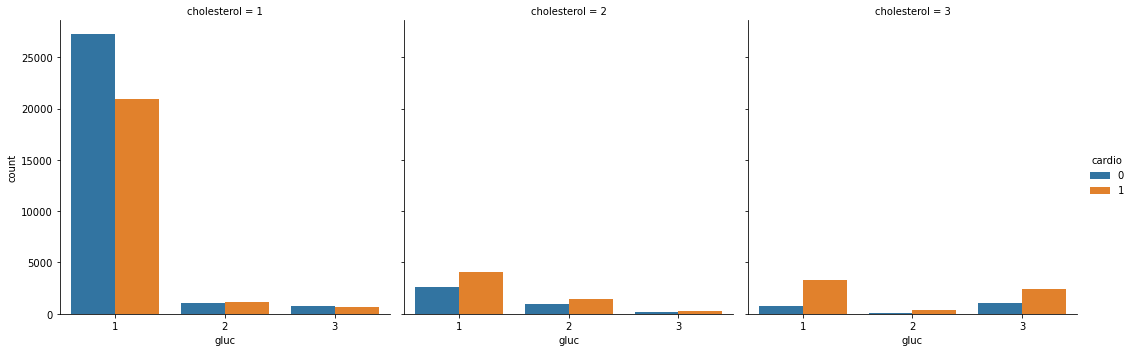

In [75]:
## Analysing cholesterol,gluc,and cardio
sns.catplot(x='gluc',hue='cardio',col='cholesterol',data=df,kind='count')
## Patients with elevated gluco level and colestrol are having cardio disease.

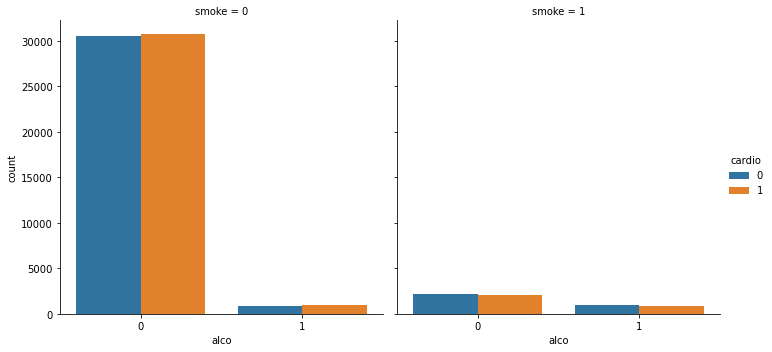

In [78]:
## Analysing smoke,alco and cardio
sns.catplot(x='alco',hue='cardio',col='smoke',data=df,kind='count')

In [80]:
df.groupby(by=['alco','smoke'])['cardio'].count()
## 2.65% of patients who takes alco and smoke are suffering from cardio diseases.

alco  smoke
0     0        61300
      1         4267
1     0         1899
      1         1835
Name: cardio, dtype: int64